In [1]:
# Set up the environment
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The goal
What are common features among colleges and universities that have closed in the last decade?
Using these features, is it possible to predict which schools are in danger of closing in the near future?
Are there steps that schools can take to mitigate the features which may lead to their closing?

# Data collection
The data come from the US Department of Education College Scorecard, which is available on Kaggle and from the US Department of Education at https://collegescorecard.ed.gov/data/.

In [2]:
# Load the csv files year by year; add a year column and merge them into one dataframe
filepath = "./data/raw/11_6609_bundle_archive/"
year = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
df_dict = {}

fields = ['OPEID','INSTNM','CITY', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL','region', 'ADM_RATE',\
         'UGDS', 'CURROPER', 'NPT4_PUB', 'NPT4_PRIV', 'COSTT4_A', 'COSTT4_P','TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'PFTFAC',\
         'C150_4', 'C150_L4','RET_FT4','RET_FTL4','RET_PT4','RET_PTL4','PCTFLOAN','UG25abv',\
         'COMP_ORIG_YR4_RT','WDRAW_ORIG_YR4_RT', 'ENRL_ORIG_YR4_RT', 'DEBT_MDN']

for yr in year:
    filename = filepath + "MERGED" + yr + "_PP.csv"
    print(filename)
    df_dict[yr] = pd.read_csv(filename, usecols=fields, low_memory=False)
    df_dict[yr]['Year'] = yr

./data/raw/11_6609_bundle_archive/MERGED2003_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2004_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2005_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2006_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2007_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2008_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2009_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2010_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2011_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2012_PP.csv
./data/raw/11_6609_bundle_archive/MERGED2013_PP.csv


In [3]:
data = pd.concat([df for df in df_dict.values()], ignore_index=True)

## Data organization
Create a file structure (and add work to GitHub repo)

In [4]:
#Create directories for various components of the project
#os.mkdir("data")
#os.mkdir("data/raw")
#os.mkdir("data/interim")
#os.mkdir("data/processed")
#os.mkdir("data/external")
#os.mkdir("figures")
#os.mkdir("models")

In [5]:
# Look at basic info about the dataframe - column names, summary information
data.shape

(78617, 32)

In [6]:
data.head()

,OPEID,INSTNM,CITY,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,region,ADM_RATE,UGDS,...,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25abv,COMP_ORIG_YR4_RT,WDRAW_ORIG_YR4_RT,ENRL_ORIG_YR4_RT,DEBT_MDN,Year
0,00100200,ALABAMA A & M UNIVERSITY,NORMAL,1,3,4,1.0,5.0,0.4457,5292.0,...,NaN,NaN,NaN,NaN,0.1408,0.203088803089,0.276447876448,0.19305019305,13187,2003
1,00105200,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,1,3,4,1.0,5.0,0.8049,10381.0,...,NaN,NaN,NaN,NaN,0.2879,0.367117117117,0.291666666667,0.088963963964,10500,2003
2,02503400,SOUTHERN CHRISTIAN UNIVERSITY,MONTGOMERY,1,3,4,2.0,5.0,NaN,336.0,...,NaN,NaN,NaN,NaN,0.8720,0.366972477064,0.366972477064,PrivacySuppressed,10158,2003
3,00105500,UNIVERSITY OF ALABAMA IN HUNTSVILLE,HUNTSVILLE,1,3,4,1.0,5.0,0.8756,4966.0,...,NaN,NaN,NaN,NaN,0.2830,0.229336437718,0.296856810244,0.129220023283,10500,2003
4,00100500,ALABAMA STATE UNIVERSITY,MONTGOMERY,1,3,4,1.0,5.0,0.5042,4941.0,...,NaN,NaN,NaN,NaN,0.1349,0.138686131387,0.320504313205,0.145321831453,9938,2003


In [7]:
data.columns

Index(['OPEID', 'INSTNM', 'CITY', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL',
       'region', 'ADM_RATE', 'UGDS', 'CURROPER', 'NPT4_PUB', 'NPT4_PRIV',
       'COSTT4_A', 'COSTT4_P', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'PFTFAC',
       'C150_4', 'C150_L4', 'RET_FT4', 'RET_FTL4', 'RET_PT4', 'RET_PTL4',
       'PCTFLOAN', 'UG25abv', 'COMP_ORIG_YR4_RT', 'WDRAW_ORIG_YR4_RT',
       'ENRL_ORIG_YR4_RT', 'DEBT_MDN', 'Year'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78617 entries, 0 to 78616
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OPEID              78617 non-null  object 
 1   INSTNM             78617 non-null  object 
 2   CITY               78617 non-null  object 
 3   NUMBRANCH          78617 non-null  int64  
 4   PREDDEG            78617 non-null  int64  
 5   HIGHDEG            78617 non-null  int64  
 6   CONTROL            78594 non-null  float64
 7   region             78587 non-null  float64
 8   ADM_RATE           28863 non-null  float64
 9   UGDS               72811 non-null  float64
 10  CURROPER           78617 non-null  int64  
 11  NPT4_PUB           9156 non-null   float64
 12  NPT4_PRIV          18560 non-null  float64
 13  COSTT4_A           20504 non-null  float64
 14  COSTT4_P           12256 non-null  float64
 15  TUITFTE            75289 non-null  float64
 16  INEXPFTE           752

In [9]:
data.nunique()

OPEID                16921
INSTNM               17581
CITY                  5072
NUMBRANCH               54
PREDDEG                  5
HIGHDEG                  5
CONTROL                  3
region                  10
ADM_RATE              7461
UGDS                 11610
CURROPER                 2
NPT4_PUB              6887
NPT4_PRIV            13237
COSTT4_A             15353
COSTT4_P              9594
TUITFTE              21721
INEXPFTE             17001
AVGFACSAL             9164
PFTFAC                8560
C150_4                7358
C150_L4               8357
RET_FT4               5065
RET_FTL4              5289
RET_PT4               1841
RET_PTL4              3930
PCTFLOAN              8868
UG25abv               8543
COMP_ORIG_YR4_RT     27427
WDRAW_ORIG_YR4_RT    24776
ENRL_ORIG_YR4_RT     16104
DEBT_MDN             14106
Year                    11
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
NUMBRANCH,78617.0,4.820853,1.555930e+01,1.0000,1.00000,1.00000,2.00000,1.410000e+02
PREDDEG,78617.0,1.840607,1.017012e+00,0.0000,1.00000,2.00000,3.00000,4.000000e+00
HIGHDEG,78617.0,2.203289,1.287425e+00,0.0000,1.00000,2.00000,4.00000,4.000000e+00
CONTROL,78594.0,2.142466,8.417294e-01,1.0000,1.00000,2.00000,3.00000,3.000000e+00
region,78587.0,4.565666,2.182403e+00,0.0000,3.00000,5.00000,6.00000,9.000000e+00
ADM_RATE,28863.0,0.690312,2.249065e-01,0.0000,0.54750,0.71260,0.85520,1.000000e+01
UGDS,72811.0,2301.504457,5.170577e+03,0.0000,129.00000,526.00000,2086.00000,2.535940e+05
CURROPER,78617.0,0.853009,3.540993e-01,0.0000,1.00000,1.00000,1.00000,1.000000e+00
NPT4_PUB,9156.0,8861.269878,4.428223e+03,-6359.0000,5692.50000,8113.00000,11603.25000,3.474900e+04
NPT4_PRIV,18560.0,17982.273545,7.462133e+03,-103168.0000,13120.75000,18179.50000,22487.00000,8.757000e+04


## Explore data types 
Many of the columns that I expected to be numerical data were actually classifed as strings. I tried to convert them to numbers, but got an error message, so I explored the content of the colummns and the data dictionary to see what the problem was.

For privacy reasons, some of the columns include data is coded as "PrivacySupressed".

In [11]:
# Look at individual column information to assess and assign data types
print((data.COMP_ORIG_YR4_RT.value_counts()/len(data.COMP_ORIG_YR4_RT)) *100)
print((data.COMP_ORIG_YR4_RT.isnull().sum() /len(data.COMP_ORIG_YR4_RT)) *100)

PrivacySuppressed    13.348258
0                     3.832504
1                     0.431204
0.5                   0.352341
0.666666666667        0.199702
                       ...    
0.541242937853        0.001272
0.073660714286        0.001272
0.050100200401        0.001272
0.149494949495        0.001272
0.779527559055        0.001272
Name: COMP_ORIG_YR4_RT, Length: 27427, dtype: float64
14.501952503911367


In [12]:
# Replace "PrivacySuppressed" with null values (NaN)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace("PrivacySuppressed", "NaN")

## Combine columns

There are several columns with the same information for different categories of schools (Public vs Private, Academic Year vs Annual Year). Each of the individual columns is missing a lot of data, but there would be less missing data if they were combined.

In [13]:
#Compare Net Price columns for private and public, to see if they can be combined into one column.
net_price = data[['NPT4_PUB', 'NPT4_PRIV']]
not_null = net_price.notnull()
eitherdf = net_price.loc[(not_null['NPT4_PUB'])|(not_null['NPT4_PRIV'])]

take_full = lambda s1, s2: s1 if np.isnan(s2) else s2

data['NetPrice'] = data['NPT4_PUB'].combine(data['NPT4_PRIV'], take_full)
data['Cost'] = data['COSTT4_P'].combine(data['COSTT4_A'], take_full)

In [14]:
data['NetPrice'].loc[data['NetPrice'].notnull()].shape

(27716,)

In [15]:
data['Cost'].loc[data['Cost'].notnull()].shape

(32760,)

## Percentage of null values per column

In [16]:
# Look at percentage of null values per column
nas=pd.DataFrame(data.isnull().sum().sort_values(ascending=False)/len(data),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
NPT4_PUB,0.883537
COSTT4_P,0.844105
RET_PT4,0.804406
NPT4_PRIV,0.763919
COSTT4_A,0.739191
RET_PTL4,0.713968
RET_FT4,0.708727
C150_4,0.685819
NetPrice,0.647455
ADM_RATE,0.632866


In [17]:
# Get a list of columns with > 90% NAN values
to_drop = [column for column in data.columns if (data[column].isnull().sum()/len(data[column]) > 0.90)]
#data.isnull().sum()/len(data)

print("Columns to drop include: ", to_drop)

Columns to drop include:  []


My first attempt at data wrangling had many colums with missing values. Based on the data wrangling and exploratory data analysis has led me to refine the list of colums to import, which means there are no longer any columms with >90% missing values.

In [18]:
# Remove columns with > 90% NAN values from dataframe
data = data.drop(to_drop, axis=1)
#data.head()

# Convert data types

In [19]:
data_types = {"PREDDEG": 'category', "HIGHDEG": 'category', 'CONTROL':'category', 'region':'category', 
              'CURROPER':'bool', 'DEBT_MDN':'float64','COMP_ORIG_YR4_RT': 'float64', 
              'WDRAW_ORIG_YR4_RT':'float64', 'ENRL_ORIG_YR4_RT':'float64'}

for col in data_types.keys():
    data[col] = data[col].astype(data_types[col])

In [20]:
data['Year']= pd.to_datetime(data['Year'])

In [21]:
#Rename columns to be more descriptive
# col_names = ['Id','OPEID','Name','City','Zip','Predominant degree', 'Main branch', 'NumBranches',\
#             'Primary degree type', 'High degree', 'Control', 'StateCode','Region', \
#             'AdmissionRate', 'ACTMidpoint', 'SATAvg',\
#             'Enrollment-DegreeSeeking', \
#             'CURROPER','NetPrice-Private', 'AvgCost-AY', 'TuitionRevenue/FTE',\
#             'Expenditure/FTE','AvgFaculty Salary', 'Percent Fulltime Faculty', 'Completion-4yr', 'Completion<4yr','RetentionFT-4yr', \
#             'RetentionFT-<4yr','RetentionPT-4yr', 'RetentionPT-<4yr', 'PercentFedLoan','PercentAge>25', \
#             'PercentCompleted4yr', 'PercentWithdraw4yr', 'PercentEnrolled4yr',\
#             'PercentAidedLowIncome', 'PercentIndependent', 'PercentDependentLowIncome','PercentIndepentdentLowIncome',\
#             'PercentFirstGen','AvgIncomeDependent','AvgIncomeIndep','MedianDebt', \
#             'MedianDebtCompleters', 'MedianDebtNotComplete', 'PercentReceiveFedLoan','AvgAgeEntry', 'PercentFemale',\
#             'PercentMarried','PercentDependent','PercentVeteran', 'AvgFamilyIncome','MedianFamilyIncome',\
#             'MedianHouseholdIncome']
# data.columns = col_names
# data.set_index('Id').head()

In [22]:
# Look for duplicate rows
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF

,OPEID,INSTNM,CITY,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,region,ADM_RATE,UGDS,...,RET_PTL4,PCTFLOAN,UG25abv,COMP_ORIG_YR4_RT,WDRAW_ORIG_YR4_RT,ENRL_ORIG_YR4_RT,DEBT_MDN,Year,NetPrice,Cost


## Save wrangled data to .csv file

In [23]:
# Write complete dataframe to file.
data.to_csv('data/interim/scorecard.filtered.csv')

# Exploratory Data Analysis
## Initial questions about the data
1. How does price differ based on school control (public, private nonprofit, private for-profit)?
2. Does size (student enrollment and number of faculty) vary by control?
3. What factors contribute to schools closing? What is the distribution of closed schools (by region, size, control)
4. How does student debt relate to school size and control? Does student debt contribute to schools closing?

## More detailed exploration of null values

In [24]:
#Check for null values
nulldata = data.isnull().sum()
nulldata = pd.DataFrame(nulldata)
nulldata.columns = ["Count"]
nulldata['Percent'] = (data.isnull().sum())/data.shape[0]

print(nulldata.loc[nulldata['Percent']>0])

                   Count   Percent
OPEID              23272  0.296017
CONTROL               23  0.000293
region                30  0.000382
ADM_RATE           49754  0.632866
UGDS                5806  0.073852
NPT4_PUB           69461  0.883537
NPT4_PRIV          60057  0.763919
COSTT4_A           58113  0.739191
COSTT4_P           66361  0.844105
TUITFTE             3328  0.042332
INEXPFTE            3328  0.042332
AVGFACSAL          30871  0.392676
PFTFAC             23648  0.300800
C150_4             53917  0.685819
C150_L4            36733  0.467240
RET_FT4            55718  0.708727
RET_FTL4           41337  0.525802
RET_PT4            63240  0.804406
RET_PTL4           56130  0.713968
PCTFLOAN           44173  0.561876
UG25abv            39219  0.498862
COMP_ORIG_YR4_RT   21895  0.278502
WDRAW_ORIG_YR4_RT  23093  0.293741
ENRL_ORIG_YR4_RT   29734  0.378213
DEBT_MDN           13440  0.170955
NetPrice           50901  0.647455
Cost               45857  0.583296


The columms with the highest percentage of missing values are also columns that were combined in a previous step (NetPrice and Cost), so it is safe to delete those four columns.

The other columns with high missing rates are the RET columns (retention rates). For the time being, I'm going to keep those columns.

In [25]:
to_drop = ['NPT4_PUB', 'NPT4_PRIV', 'COSTT4_A', 'COSTT4_P']
data = data.drop(to_drop, axis=1)
print(data.shape)

(78617, 30)


## Number and names of schools in the database
- How many rows are in the database?
- How many unique schools are in the database? By OPEID and by Name

In [26]:
n_data = data.shape[0]
print("There are ", n_data, " observations in the data")

n_opeid = data["OPEID"].nunique()
print("There are ", n_opeid, "unique OPEIDs in the data")
print(data.OPEID.value_counts())

There are  78617  observations in the data
There are  8592 unique OPEIDs in the data
00224900    27
01308800    10
02179907    10
03021500    10
03422500     9
            ..
04159300     1
03664300     1
00732970     1
10732925     1
04161100     1
Name: OPEID, Length: 8592, dtype: int64


In [27]:
data['INSTNM'] = data['INSTNM'].str.lower()
n_schools = data['INSTNM'].nunique()
print("There are ", n_schools, "unique school names in the data")
print(data.INSTNM.value_counts())

There are  12040 unique school names in the data
itt technical institute                              230
marinello school of beauty                           129
lincoln technical institute                          100
sanford-brown institute                               77
ross medical education center                         70
                                                    ... 
virginia baptist college                               1
fashion institute of design and merchandising-los      1
old town barber college-topeka                         1
vista college-longview                                 1
michigan state university-college of law               1
Name: INSTNM, Length: 12040, dtype: int64


There are 8592 OPEID numbers and 12040 unique school names in the data, which means that some school names share OPEID numbers. To get a sense for the data, I think it will be important to know how schools names relate to the OPEID numbers.

How many school names occur only once in the database? What are those schools?

In [28]:
unique_names = data.INSTNM.value_counts(ascending = True)[data.INSTNM.value_counts()==1]
print(unique_names)

michigan state university-college of law             1
vista college-longview                               1
old town barber college-topeka                       1
fashion institute of design and merchandising-los    1
virginia baptist college                             1
                                                    ..
steno tech career institute                          1
teikyo post university                               1
itt technical institute-tallahassee                  1
allentown business school                            1
university of south florida st. petersburg           1
Name: INSTNM, Length: 1644, dtype: int64


There are 1644 schools names that are unique.

That means that there are roughly 10,400 school names that occur more than once. How many schools occur multiple times, and how many times do they occur?

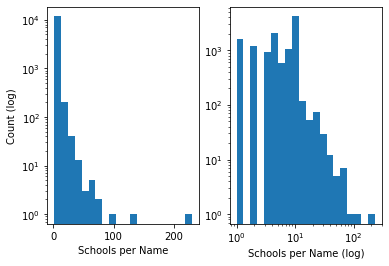

In [29]:
#Plot histogram of number of schools per Name
plt.subplot(1, 2, 1)
#plt.hist(data['Name'].value_counts())
hist, bins, _ = plt.hist(data['INSTNM'].value_counts(), bins=20)
plt.xlabel('Schools per Name')
plt.ylabel('Count (log)')
plt.yscale('log')

plt.subplot(1, 2, 2)
# Converted to logarithmic scale
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(data['INSTNM'].value_counts(), bins=logbins)
plt.xlabel('Schools per Name (log)')
plt.xscale('log')
plt.yscale('log')
plt.show()

There is one school name with more than 200 occurences in the database, which skews the histogram and its bin sizes. Converting the number of schools (and counts) to a log scale more clearly shows the distribution of the schools by their count in the data.

While there are many unique school names, there are also equally many schools names with counts of between 10 & 100.

Now that we have a sense of how often school names are repeated in the database, we can explore the distribution of the OPEID.

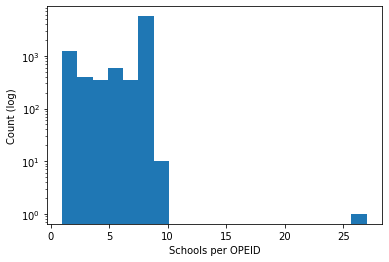

In [30]:
#Plot histogram of number of schools per OPEID
plt.hist(data['OPEID'].value_counts(), bins=20)
plt.xlabel('Schools per OPEID')
plt.ylabel('Count (log)')
plt.yscale('log')

The number of observations per OPEID are much less varied than the school names, with the max count being around 26. This must mean that schools with the same name can have multiple OPEIDs.

From the list and counts of school names (above), ITT Technical Institute occurs most often in the database. How many OPEIDs are associated with ITT Tech?

In [31]:
itt = data.loc[data['INSTNM'].str.startswith('itt tech')] # TECHNICAL INSTITUTE']
print(itt.OPEID.value_counts())
print("ITT Technical Institue has 230 schools distrubted over 223 OPEIDs")

00732907    8
00732902    8
00844300    8
00732905    8
03071801    8
           ..
00732947    1
10732915    1
00732925    1
00732922    1
10732924    1
Name: OPEID, Length: 223, dtype: int64
ITT Technical Institue has 230 schools distrubted over 223 OPEIDs


The maximum number of OPEIDs associated with ITT Tech is 8. How are the schools names associated with one OPEID related?

In [32]:
itt_sample = data.loc[data.OPEID == '00732903']
itt_sample

,OPEID,INSTNM,CITY,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,region,ADM_RATE,UGDS,...,RET_PTL4,PCTFLOAN,UG25abv,COMP_ORIG_YR4_RT,WDRAW_ORIG_YR4_RT,ENRL_ORIG_YR4_RT,DEBT_MDN,Year,NetPrice,Cost
5001,00732903,itt technical institute,HOUSTON,6,2,2,3.0,6.0,0.4577,664.0,...,NaN,NaN,0.3298,0.351468,0.272453,0.008204,9791.0,2003-01-01,NaN,NaN
11510,00732903,itt technical institute,HOUSTON,6,2,2,3.0,6.0,0.3846,464.0,...,27.0000,NaN,NaN,0.336726,0.301327,0.015044,9126.0,2004-01-01,NaN,NaN
18138,00732903,itt technical institute,Houston,6,2,2,3.0,6.0,0.5191,380.0,...,53.0000,NaN,0.3763,0.440325,0.307866,0.013562,8834.0,2005-01-01,NaN,NaN
24917,00732903,itt technical institute-houston north,Houston,6,2,2,3.0,6.0,0.4413,385.0,...,52.0000,NaN,NaN,0.404772,0.380913,0.013395,7292.0,2006-01-01,NaN,NaN
31720,00732903,itt technical institute-houston north,Houston,6,2,2,3.0,6.0,0.3772,448.0,...,NaN,NaN,0.3996,0.358586,0.418110,0.013348,7501.0,2007-01-01,NaN,NaN
38577,00732903,itt technical institute-houston north,Houston,6,2,2,3.0,6.0,0.4512,641.0,...,0.2000,NaN,NaN,0.304580,0.428954,0.018723,9500.0,2008-01-01,NaN,NaN
45513,00732903,itt technical institute-houston north,Houston,6,2,2,3.0,6.0,0.4825,905.0,...,0.2222,0.8830,0.5006,0.292739,0.398033,0.021984,9500.0,2009-01-01,23402.0,25424.0
52622,00732903,itt technical institute-houston north,Houston,119,2,2,3.0,6.0,0.4178,1007.0,...,NaN,0.8729,NaN,0.312364,0.385304,0.021692,6334.0,2010-01-01,19505.0,24635.0


All of these schools are in Houston. They may have different names - some include the name "Houston" or "Houston-North." They also all have different IDs, which leads to some questions about how the ID number relates to the OPEID and the school name. This information may be in the data dictionary, or other meta-data documents.

## Explore categorical columns

Several columns from the original analysis have been discarded from the current analysis.

### Number of branches
All of the schools were labeled as main branches in the original dataset, however some schools are associated with multiple branches.

1      55705
2       6871
3       3806
4       2374
5       1510
6       1130
8        606
7        521
9        435
11       430
10       409
23       301
14       286
141      282
78       234
74       222
13       221
26       182
19       173
86       172
31       155
38       152
15       136
16       129
128      128
119      119
17       119
28       115
12       113
99       101
20       100
93        95
22        88
44        88
84        85
85        85
18        74
72        72
68        72
71        71
70        70
63        63
60        60
59        59
54        54
51        51
50        50
42        42
41        41
40        40
36        36
33        33
30        30
21        21
Name: NUMBRANCH, dtype: int64


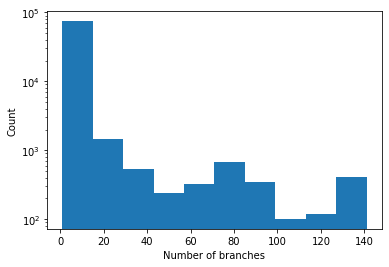

In [33]:
print(data['NUMBRANCH'].value_counts())
plt.hist(data['NUMBRANCH'])
plt.xlabel('Number of branches')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Most schools (55705) have only a single branch, while a few have more than 100 branches. It will be interesting to see how the number of branches might relate to school name and OPEID, particularly for the schools with more than 100 branches.

### Primary degree type

What are the values and distribution of the 'Primary degree type' column? 

They have been processed as categorical data, but coded numerically - which is appropriate for the machine learning model, but not easily human-readable.

In [34]:
predom_degree = {'0':'Not classified', '1':'Certificate', '2':'Associates', '3':'Bachelor', '4':'Graduate'}
pred_deg = data['PREDDEG'].astype('str')

for i in range(len(pred_deg)):
    val = pred_deg[i]
    cat = predom_degree[val]
    pred_deg[i] = cat

pred_deg.value_counts()

Certificate       33193
Bachelor          22214
Associates        16234
Not classified     3876
Graduate           3100
Name: PREDDEG, dtype: int64

### High degree awarded
What are the values and distributions in the 'High degree' column? Again, these should be categorical variables. How is the highest degree offered by an institution related to the primary degree type?

In [35]:
high_degree = {'0':'No degree', '1':'Certificate', '2':'Associates', '3':'Bachelor', '4':'Graduate'}
high_deg = data['HIGHDEG'].astype('str')

for i in range(len(high_deg)):
    val = high_deg[i]
    cat = high_degree[val]
    high_deg[i] = cat

high_deg.value_counts()

Certificate    26448
Graduate       20709
Associates     18820
Bachelor        8764
No degree       3876
Name: HIGHDEG, dtype: int64

Interestingly, there are 3876 non-degree-granting institutions, which is the same number as the "Not classifed" category in the 'Primary degree type' column.

The following pivot table and heat map shows how the primary degree type and the high degree type are related.

HIGHDEG     0      1      2     3      4
PREDDEG                                 
0        3876      0      0     0      0
1           0  26448   6002   420    323
2           0      0  12818  2825    591
3           0      0      0  5519  16695
4           0      0      0     0   3100


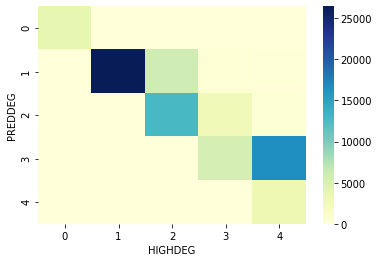

In [36]:
degree = data.pivot_table(index='PREDDEG', columns='HIGHDEG', aggfunc='size')
print(degree)
sns.heatmap(degree, cmap='YlGnBu')

Indeed, the 3876 'Non-degree granting institutions' from 'High degree" are the same as the 'Not classified' schools from 'Primary degree type'.

Not surprisingly, the highest degrees offered at each institution are at least as high as their primary degree - there is not a primarily bachelor's granting institution with the highest degree of a certificate. However, the highest degree offered by a school may be higher than it's predominant degree type. For each school type, there are several primarily certificate institutions that also award graduate degrees.

A vast majority of the certificate granting instutitions and associates granting institutions offer a certificate and associate's degree, respectively, as their highest degree. However, 73.7% of the bachelor's granting institutions offer graduate degrees as their highest degree.

Given some of the predictability in the patterning between these two columns, it seems likely that only one of these categories will need to be kept in the final analysis. My inclination is to keep the 'Primary degree type' column, and delete the 'High degree' column.

### Control - Public, Private nonprofit and Private-for-profit
What is the distribution of schools by "Control" type? There are three types coded in the data: Public, Private nonprofit and Private for-profit

In [37]:
control_type = {'1.0':'Public', '2.0':'Private nonprofit', '3.0':'Private for-profit', 'nan':np.nan}

control_cat = data['CONTROL'].astype('str')

for i in range(len(control_cat)):
    val = control_cat[i]
    cat = control_type[val]
    control_cat[i] = cat

print(control_cat.value_counts())
print('There are ', control_cat.isnull().sum(), 'null values.')

school_total = 34238 + 23041 + 21315
percent_forprofit = (34238/school_total) * 100
print("For profit = " , percent_forprofit,"%")

Private for-profit    34238
Public                23041
Private nonprofit     21315
Name: CONTROL, dtype: int64
There are  23 null values.
For profit =  43.563121866809176 %


There are approximately equal numbers of public and private non-profit schools. About 40% of the schools are private for-profit schools. It will be interesting to see how the control type interacts with the other variables like cost, size, and degree type.

### Location - Region
How are the schools distributed by state and region?
While there is information available about the state of each school, the state and region would be highly correlated, since the region category is based on state.

In [38]:
region_dict = {"0.0": 'US Service Schools',
               "1.0": 'New England',  # CT, ME, MA, NH, RI, VT
               "2.0": 'Mid East',     # DE, DC, MD, NJ, NY, PA
               "3.0": 'Great Lakes',  # IL, IN, MI, OH, WI
               "4.0": 'Plains',       # IA, KS, MN, MO, NE, ND, SD
               "5.0": 'Southeast',    # AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV
               "6.0": 'Southwest',    # AZ, NM, OK, TX
               "7.0": 'Rocky Mountains', # CO, ID, MT, UT, WY
               "8.0": 'Far West',     # AK, CA, HI, NV, OR, WA
               "9.0": 'Outlying Areas' # AS, FM, GU, MH, MP, PR, PW, VI
}

data.region.value_counts()

5.0    18928
2.0    12616
3.0    11711
8.0    10884
6.0     8015
4.0     7095
1.0     4756
7.0     2820
9.0     1751
0.0       11
Name: region, dtype: int64

## Explore columns with numerical values
### Enrollment
The 'Enrollment-DegreeSeeking' column contains the number undergraduate degree-seeking students enrolled at the institution.

In [39]:
print('Null count: ', data['UGDS'].isnull().sum())
zero = data.loc[data['UGDS']==0]
print('Schools with 0 Enrollment', zero.shape[0])
data['UGDS'].describe().T

Null count:  5806
Schools with 0 Enrollment 126


count     72811.000000
mean       2301.504457
std        5170.576937
min           0.000000
25%         129.000000
50%         526.000000
75%        2086.000000
max      253594.000000
Name: UGDS, dtype: float64

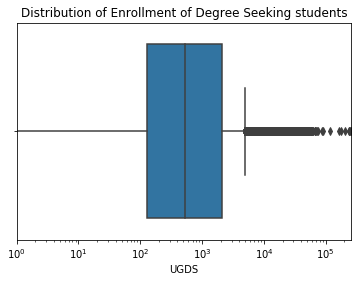

In [40]:
sns.boxplot('UGDS', data=data)
plt.title('Distribution of Enrollment of Degree Seeking students')
plt.xscale('log')
plt.xlim([1, 260000])
plt.show()

Given the wide range of enrollments and huge numbers of outliers, it might be helpful to convert enrollment into bins - small, medium, large, huge; or by number ranges

In [41]:
# Convert to bins - experiment with different values to see what works
bins=[0, 1, 150, 500, 2000, 260000]
labels = ['none', 'small', 'medium', 'large', 'xl']
#bins = {'none': 0, 'small': 1-150, 'medium': 151-500, 'large': 501-2000, 'xl': 2000+}
data["EnrollmentBins"]=pd.cut(data['UGDS'], bins, labels = labels )
data["EnrollmentBins"].value_counts()

small     20246
xl        18729
large     18342
medium    15340
none         28
Name: EnrollmentBins, dtype: int64

### Tuition Revenue

The next column contains the Tuition Revenue per Full-Time equivalent student. According to the data dictionary, this is the net tuition revenue (tuition revenue minus discounts and allowances) divided by the number of FTE students (undergraduates and graduate students). Generally, a full time equivalence is 12 undergraduate credit hours or 6 graduate hours per semester.

In [42]:
print('Null count: ', data['TUITFTE'].isnull().sum())

zero = data.loc[data['TUITFTE']==0]
print('Schools with 0 TuitionRevenue/FTE', zero.shape[0])

data['TUITFTE'].describe()

Null count:  3328
Schools with 0 TuitionRevenue/FTE 311


count    7.528900e+04
mean     1.005315e+04
std      1.139392e+05
min      0.000000e+00
25%      2.839000e+03
50%      6.520000e+03
75%      1.137800e+04
max      2.667016e+07
Name: TUITFTE, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


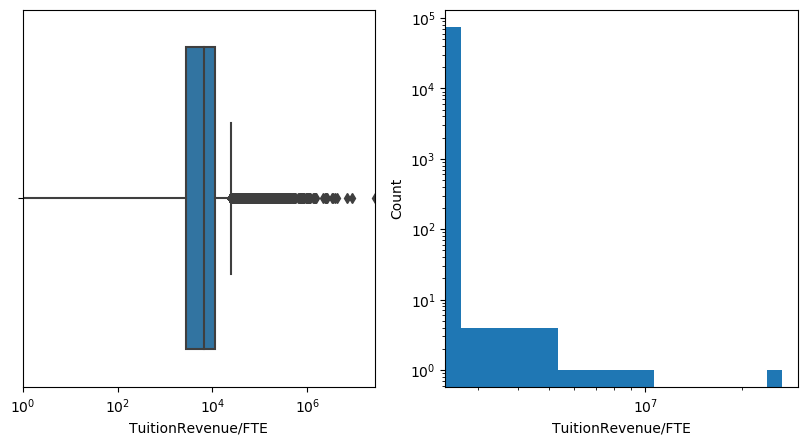

In [43]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('TUITFTE', data=data)
plt.xlabel('TuitionRevenue/FTE')
plt.xscale('log')
plt.xlim([1, 2.67e+07])

plt.subplot(1, 2, 2)
plt.hist(data['TUITFTE'])
plt.xlabel('TuitionRevenue/FTE')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

There are 31 schools that report 0 tuition revenue, though 3328 schools have null values. It might be worth binning the Tuition Revenue column into ranges, or groups.

One school seems to have a much higher tuition than the others. Which school is this, and what is their tuition rate?

In [44]:
high_tuition_school = data['TUITFTE'].max()
high_tuition = data.loc[data['TUITFTE']==high_tuition_school]

high_tuition.iloc[0]
high_tuition_name = high_tuition.iloc[0]['INSTNM']
high_tuition_amount = high_tuition.iloc[0]['TUITFTE']

print(high_tuition_name, high_tuition_amount)

brooks college 26670163.0


Brooks College in Long Beach, CA has a tuition revenue of $26,670,163, which seems really high. I'm going to drop this school for the purposes of the following exploration.

In [45]:
data.drop(high_tuition.index, inplace=True)

In [46]:
# Convert tuition to bins
bins = [0, 1, 2500, 6000, 10000, 30000000]
label = ['none', 'low', 'med', 'high', 'highest']
data['TuitionBins'] = pd.cut(data['TUITFTE'], bins=bins, labels = label)
data.TuitionBins.value_counts()

highest    23411
med        18612
high       16564
low        16389
none           1
Name: TuitionBins, dtype: int64

### Expenditure
Next, is the Expenditure/FTE column which contains "Instructional expenditures divided by the number of FTE students (undergraduates and graduate students) (http://nces.ed.gov/ipeds/glossary/index.asp?id=854)."

In [47]:
print('Null count: ', data['INEXPFTE'].isnull().sum())
zero = data.loc[data['INEXPFTE']==0]
print('Schools with 0 Expenditure/FTE', zero.shape[0])

data['INEXPFTE'].describe()

Null count:  3328
Schools with 0 Expenditure/FTE 178


count    7.528800e+04
mean     1.313820e+04
std      1.079002e+06
min      0.000000e+00
25%      2.654000e+03
50%      4.391000e+03
75%      6.979250e+03
max      2.920157e+08
Name: INEXPFTE, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


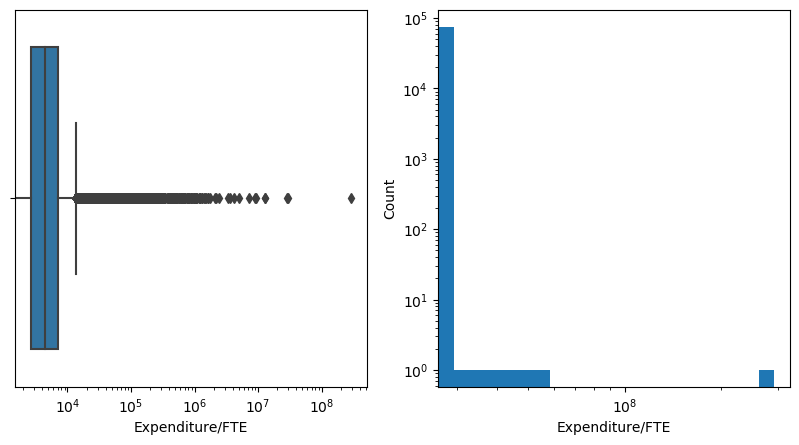

In [48]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('INEXPFTE', data=data)
plt.xlabel('Expenditure/FTE')
plt.xscale('log')

plt.subplot(1, 2, 2)
plt.hist(data['INEXPFTE'])
plt.xlabel('Expenditure/FTE')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

What is the school with the max value? It seems to be way higher than even the other high values.

In [49]:
max_expend = data['INEXPFTE'].max()
max_expenditure_school = data.loc[data['INEXPFTE']== max_expend]
#print(max_expenditure_school.Name)
#data.drop(max_expenditure_school.index, inplace=True)

max_expenditure_school.iloc[0]
max_expend_name = max_expenditure_school.iloc[0]['INSTNM']
max_expend_amount = max_expenditure_school.iloc[0]['INEXPFTE']

print(max_expend_name, max_expend_amount)

st joseph school of nursing 292015675.0


I wonder why St. Joseph School of Nursing has such a high Expenditure/FTE. It is certificate granting institution with the highest degree as a certificate. I'm going to drop this school for now.

It will be interesting to see if Tuition/Revenue and Expenditure correlate.

In [50]:
# Convert values to bins
data['ExpenditureBins'] = pd.cut(data['INEXPFTE'], bins=bins, labels = label)
data.ExpenditureBins.value_counts()

med        33640
low        17028
high       14747
highest     9686
none           7
Name: ExpenditureBins, dtype: int64

### Admission Rate

The Admission Rate is the "number of admitted undergraduates divided by the number of undergraduates who applied."

In [51]:
print('Null count: ', data['ADM_RATE'].isnull().sum() , " - " , round(data['ADM_RATE'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['ADM_RATE']==0]
print('Schools with 0 Admission Rate', zero.shape[0])

data['ADM_RATE'].describe()

Null count:  49753  -  63.0 %
Schools with 0 Admission Rate 30


count    28863.000000
mean         0.690312
std          0.224907
min          0.000000
25%          0.547500
50%          0.712600
75%          0.855200
max         10.000000
Name: ADM_RATE, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


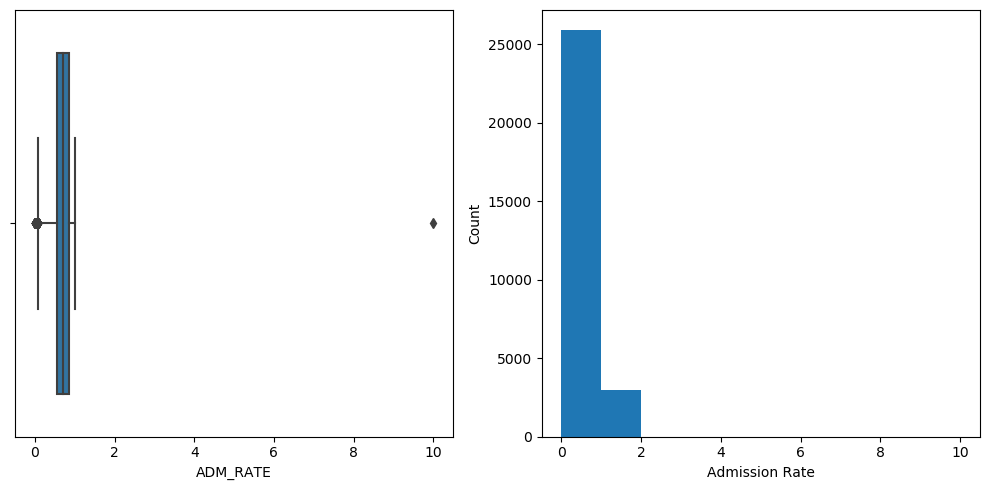

In [52]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('ADM_RATE', data=data)
#plt.xscale('log')

plt.subplot(1, 2, 2)
plt.hist(data['ADM_RATE'])
plt.xlabel('Admission Rate')
plt.ylabel('Count')
#plt.xscale('log')
#plt.yscale('log')
plt.tight_layout()
plt.show()

The value of 10 is way to high - since the max value should be 1. I'm going to replace this value with 1.

In [53]:
admin_rate = data['ADM_RATE'].max()
admin_rate_school = data.loc[data['ADM_RATE']== admin_rate]
print(admin_rate_school.INSTNM)
data.loc[admin_rate_school.index, 'ADM_RATE'] = 1
#data.drop(max_expenditure_school.index, inplace=True)

5757    marion community schools tucker career & techn...
Name: INSTNM, dtype: object


In [54]:
data['ADM_RATE'].describe()

count    28863.000000
mean         0.690000
std          0.218136
min          0.000000
25%          0.547500
50%          0.712600
75%          0.855200
max          1.000000
Name: ADM_RATE, dtype: float64

### Average monthly faculty salary

The next column is Average Faculty Salary per month. According to the data dictionary, it is calculated from the "total salary outlays divided by the number of months worked for all full-time nonmedical instructional staff." 

In [55]:
print('Null count: ', data['AVGFACSAL'].isnull().sum(), " - " , round(data['AVGFACSAL'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['AVGFACSAL']==0]
print('Schools with 0 AvgFaculty Salary', zero.shape[0])

data['AVGFACSAL'].describe()

Null count:  30871  -  39.0 %
Schools with 0 AvgFaculty Salary 0


count    47745.000000
mean      5535.529207
std       2025.078435
min         42.000000
25%       4200.000000
50%       5313.000000
75%       6615.000000
max      24892.000000
Name: AVGFACSAL, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


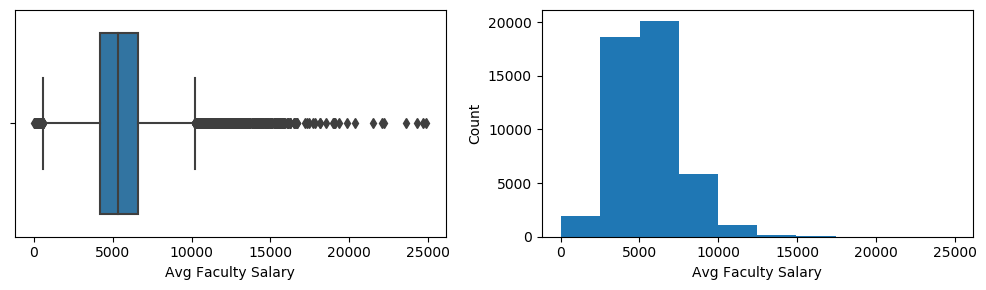

In [56]:
fig=plt.figure(figsize=(10,3), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('AVGFACSAL', data=data)
plt.xlabel('Avg Faculty Salary')

plt.subplot(1, 2, 2)
plt.hist(data['AVGFACSAL'])
plt.xlabel('Avg Faculty Salary')
plt.ylabel('Count')
#plt.xscale('log')
plt.tight_layout()
plt.show()

Given the wide distribution of these values, it might be worth putting them into bins.

It will be interesting to see how faculty salary varies by school type, size, and tuition revenue.

In [57]:
bins = [0, 1, 4000, 6000, 8000, 25000]
data['FacultyBins'] = pd.cut(data['AVGFACSAL'], bins=bins, labels=label)
data.FacultyBins.value_counts()

med        20620
high       11805
low        10156
highest     5164
none           0
Name: FacultyBins, dtype: int64

### Percent fulltime faculty
The next column is the percentage of faculty that are fulltime faculty. The value should be between 0 and 1.

In [58]:
print('Null count: ', data['PFTFAC'].isnull().sum()," - " , round(data['PFTFAC'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['PFTFAC']==0]
print('Schools with 0 Percent Fulltime Faculty', zero.shape[0])

data['PFTFAC'].describe()

Null count:  23648  -  30.0 %
Schools with 0 Percent Fulltime Faculty 63


count    54968.000000
mean         0.579416
std          0.299727
min          0.000000
25%          0.320500
50%          0.555600
75%          0.869725
max          1.166700
Name: PFTFAC, dtype: float64

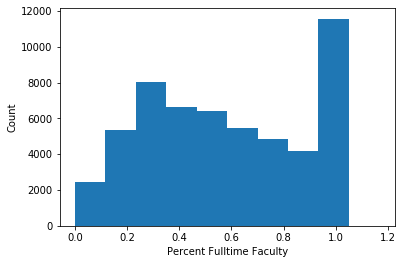

In [59]:
plt.hist(data['PFTFAC'])
plt.xlabel('Percent Fulltime Faculty')
plt.ylabel('Count')
plt.show()

The max value for this column is 1.16. Since the value is a percent, it doesn't make sense for a school to be able to have more than 100% fulltime faculty.

One school (see below) has more than 100% full time faculty. (It seems reasonable to replace the values with 1, since a value of more than 1 doesn't make sense.)

In [60]:
more_faculty = data.loc[data['PFTFAC'] > 1]
data.loc[more_faculty.index, 'PFTFAC'] = 1
more_faculty.head()

,OPEID,INSTNM,CITY,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,region,ADM_RATE,UGDS,...,WDRAW_ORIG_YR4_RT,ENRL_ORIG_YR4_RT,DEBT_MDN,Year,NetPrice,Cost,EnrollmentBins,TuitionBins,ExpenditureBins,FacultyBins
1593,02337200,pj's college of cosmetology,BOWLING GREEN,5,1,1,3.0,5.0,NaN,45.0,...,0.259036,0.0,6625.0,2003-01-01,NaN,NaN,small,med,low,NaN


### Proportion of students who complete a degree
The next columns show the proportion of undergraduate students who completed their degree within 150% of the normal time. There is one column for institutions that offer primarily certificate and associate's degree programs, which typically take less than 4 years to complete, and a separate column for 4-year institutions.

There are no rows that have values for both of these columns so I  am going to combine them into one "completion" column.

In [61]:
completion_rate = data[['C150_4', 'C150_L4']]
not_null = completion_rate.notnull()
eitherdf = completion_rate.loc[(not_null['C150_4'])|(not_null['C150_L4'])]
#eitherdf.head()
#completion_rate.head(15)

data['Complete'] = data['C150_4'].combine(data['C150_L4'], take_full)

print('Null count: ', data.Complete.isnull().sum()," - " , round(data['Complete'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['Complete']==0]
print('Schools with 0 Completion rate', zero.shape[1])

data.Complete.describe()

Null count:  12033  -  15.0 %
Schools with 0 Completion rate 35


count    66583.000000
mean         0.526467
std          0.252321
min          0.000000
25%          0.325300
50%          0.539200
75%          0.724000
max          1.000000
Name: Complete, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


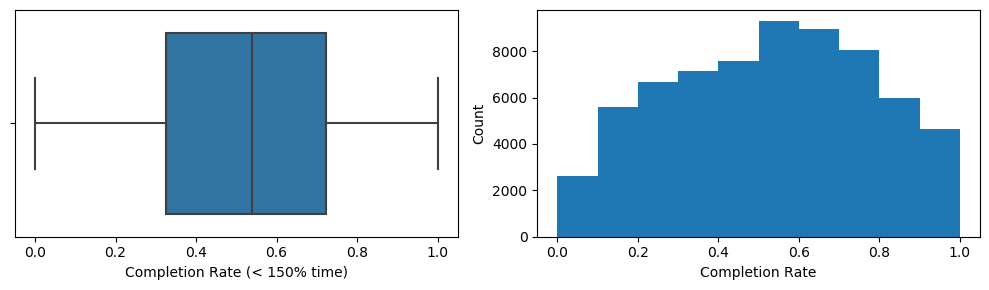

In [62]:
fig=plt.figure(figsize=(10,3), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('Complete', data=data)
plt.xlabel('Completion Rate (< 150% time)')

plt.subplot(1, 2, 2)
plt.hist(data['Complete'])
plt.xlabel('Completion Rate')
plt.ylabel('Count')
#plt.xscale('log')
plt.tight_layout()
plt.show()

### Retention Rates
According to the data documentation, "retention rate identifies (separately) the share of full-time and part-time students in the prior year, at four-year (RET_FT4 and RET_PT4) and less-than-four- year institutions (RET_FTL4 and RET_PTL4), who return to the institution after the first year. For four-year institutions, the retention rate covers bachelor’s degree-seeking students only; at less-than-four-year institutions, it covers all degree/certificate-seeking students."

After inspection the full time and part time columns can be combined. However, the FT columns are on a scale of 0 -100, and the L4 columns are on a scale of 0-1, so one set of columns will need to be converted before they are combined.

In [63]:
retention = data[['RET_FT4','RET_FTL4','RET_PT4','RET_PTL4']]
not_null = retention.notnull()
fulltimedf = retention.loc[(not_null['RET_FT4'])|(not_null['RET_FTL4'])]
print(fulltimedf.head())

partimedf = retention.loc[(not_null['RET_PT4'])|(not_null['RET_PTL4'])]
print(partimedf.tail())

      RET_FT4  RET_FTL4  RET_PT4  RET_PTL4
6585     64.0       NaN     45.0       NaN
6586     77.0       NaN     44.0       NaN
6587      0.0       NaN      0.0       NaN
6588     76.0       NaN     38.0       NaN
6589     56.0       NaN     24.0       NaN
       RET_FT4  RET_FTL4  RET_PT4  RET_PTL4
78191      NaN    0.4649      NaN    0.5679
78192      NaN    0.8519      NaN    0.8462
78193      NaN    0.8929      NaN    0.8750
78194   0.7158       NaN   0.6343       NaN
78195      NaN    0.4314      NaN    0.2609


In [69]:
# Convert the L4 school Retention columns to 0-100 scale by multiplying by 100
#data['RET_FTL4'] = data['RET_FTL4'] * 100
#data['RET_PTL4'] = data['RET_PTL4'] * 100

# Combine Retention columns
data['RetentionFT'] = data['RET_FT4'].combine(data['RET_FTL4'], take_full)
data['RetentionPT'] = data['RET_PT4'].combine(data['RET_PTL4'], take_full)

print('Null count: ', data.RetentionFT.isnull().sum(), " - " , round(data['RetentionFT'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['RetentionFT']==0]
print('Schools with 0 Completion rate - Full Time:', zero.shape[0])

print('Null count: ', data.RetentionPT.isnull().sum(), " - " , round(data['RetentionPT'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['RetentionPT']==0]
print('Schools with 0 Completion rate - Part Time:', zero.shape[0])
#print(zero.head())

data[['RetentionFT', 'RetentionPT']].describe()

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
78612   NaN
78613   NaN
78614   NaN
78615   NaN
78616   NaN
Name: RET_FTL4, Length: 78616, dtype: float64
Null count:  18437  -  23.0 %
Schools with 0 Completion rate - Full Time: 426
Null count:  40752  -  52.0 %
Schools with 0 Completion rate - Part Time: 2506


,RetentionFT,RetentionPT
count,60179.000000,37864.000000
mean,126048.903855,941.861547
std,272631.277541,2227.224918
min,0.000000,0.000000
25%,0.916700,0.666700
50%,5729.000000,42.860000
75%,8710.000000,85.710000
max,1000000.000000,10000.000000


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


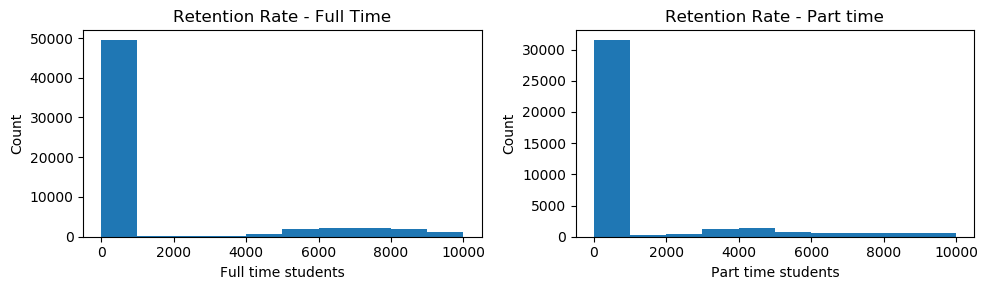

In [65]:
fig=plt.figure(figsize=(10,3), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.hist(data['RetentionFT'])
plt.xlabel('Full time students')
plt.ylabel('Count')
plt.title('Retention Rate - Full Time')

plt.subplot(1, 2, 2)
plt.hist(data['RetentionPT'])
plt.xlabel('Part time students')
plt.ylabel('Count')
plt.title('Retention Rate - Part time')

plt.tight_layout()
plt.show()

Some of the Retention rates are on a 0-1 scale and some are on a 0-100 scale. It does not appear that these values are consistent even within columns, so without a more detailed exploration, it will be difficult to convert them.

### Percent Completed, Withdrawn and Still Enrolled at the original institution after 4 years

In [66]:
print('Null count, completed: ', data['COMP_ORIG_YR4_RT'].isnull().sum(), " - " , round(data['COMP_ORIG_YR4_RT'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['COMP_ORIG_YR4_RT']==0]
print('Schools with 0 PercentCompleted4yr', zero.shape[0])

print('Null count, withdrawn: ', data['WDRAW_ORIG_YR4_RT'].isnull().sum(), " - " , round(data['WDRAW_ORIG_YR4_RT'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['WDRAW_ORIG_YR4_RT']==0]
print('Schools with 0 PercentWithdraw4yr', zero.shape[0])

print('Null count, enrolled: ', data['ENRL_ORIG_YR4_RT'].isnull().sum(), " - " , round(data['ENRL_ORIG_YR4_RT'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['ENRL_ORIG_YR4_RT']==0]
print('Schools with 0 PercentEnrolled4yr', zero.shape[0])

data[['COMP_ORIG_YR4_RT', 'WDRAW_ORIG_YR4_RT', 'ENRL_ORIG_YR4_RT']].describe()

Null count, completed:  21895  -  28.0 %
Schools with 0 PercentCompleted4yr 3013
Null count, withdrawn:  23093  -  29.0 %
Schools with 0 PercentWithdraw4yr 7208
Null count, enrolled:  29734  -  38.0 %
Schools with 0 PercentEnrolled4yr 20516


,COMP_ORIG_YR4_RT,WDRAW_ORIG_YR4_RT,ENRL_ORIG_YR4_RT
count,56721.000000,55523.000000,48882.000000
mean,0.382854,0.205227,0.039437
std,0.243066,0.140747,0.049840
min,0.000000,0.000000,0.000000
25%,0.168297,0.104762,0.000000
50%,0.385965,0.195652,0.024922
75%,0.579880,0.293804,0.065044
max,1.000000,0.842161,0.758621


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


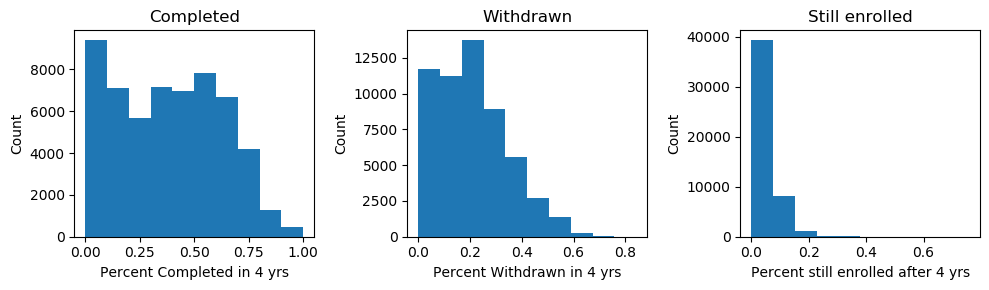

In [67]:
fig=plt.figure(figsize=(10,3), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.hist(data['COMP_ORIG_YR4_RT'])
plt.xlabel('Percent Completed in 4 yrs')
plt.ylabel('Count')
plt.title('Completed')

plt.subplot(1, 3, 2)
plt.hist(data['WDRAW_ORIG_YR4_RT'])
plt.xlabel('Percent Withdrawn in 4 yrs')
plt.ylabel('Count')
plt.title('Withdrawn')

plt.subplot(1, 3, 3)
plt.hist(data['ENRL_ORIG_YR4_RT'])
plt.xlabel('Percent still enrolled after 4 yrs')
plt.ylabel('Count')
plt.title('Still enrolled')
plt.tight_layout()
plt.show()

### Median debt amount

In [70]:
print('Null count: ', data['DEBT_MDN'].isnull().sum()," - " , round(data['DEBT_MDN'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['DEBT_MDN']==0]
print('Schools with 0 Median debt:', zero.shape[0])

data['DEBT_MDN'].describe()

Null count:  13440  -  17.0 %
Schools with 0 Median debt: 0


count     65176.000000
mean       9697.870788
std        5077.458882
min         124.000000
25%        6051.000000
50%        9000.000000
75%       12792.000000
max      131335.000000
Name: DEBT_MDN, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


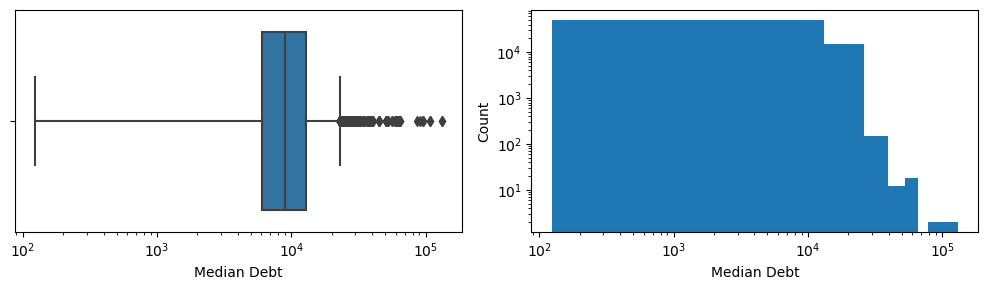

In [78]:
fig=plt.figure(figsize=(10,3), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('DEBT_MDN', data=data)
plt.xlabel('Median Debt')
plt.xscale('log')

plt.subplot(1, 2, 2)
plt.hist(data['DEBT_MDN'])
plt.xlabel('Median Debt')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

### Students above 25 years of age

In [79]:
print('Null count: ', data['UG25abv'].isnull().sum()," - " , round(data['UG25abv'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['UG25abv']==0]
print('Schools with 0 Students > 25:', zero.shape[0])

data['UG25abv'].describe()

Null count:  39219  -  50.0 %
Schools with 0 Students > 25: 0


count    39397.000000
mean         0.414991
std          0.221939
min          0.000400
25%          0.253500
50%          0.412200
75%          0.568600
max          1.000000
Name: UG25abv, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


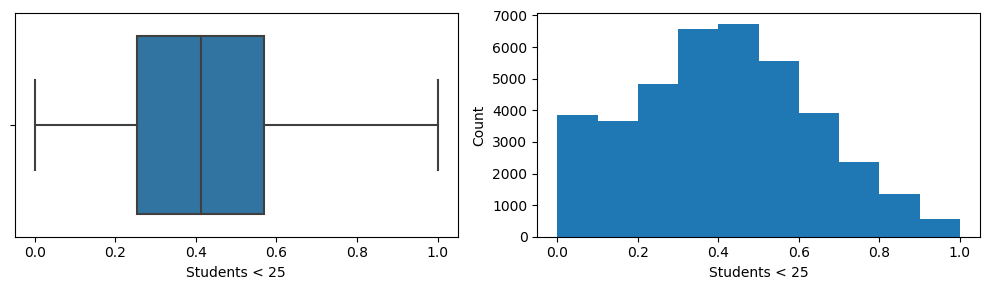

In [80]:
fig=plt.figure(figsize=(10,3), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('UG25abv', data=data)
plt.xlabel('Students < 25')

plt.subplot(1, 2, 2)
plt.hist(data['UG25abv'])
plt.xlabel('Students < 25')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Percent of students who took out a federal loan.

The column reports the "proportion of undergraduates who received a federal loan in the academic year...", expressed as a decimal, so the values should be between 0 and 1.

In [81]:
print('Null count: ', data['PCTFLOAN'].isnull().sum()," - " , round(data['PCTFLOAN'].isnull().sum()/data.shape[0] *100), "%")
zero = data.loc[data['PCTFLOAN']==0]
print('Schools with 0 Federal Loan:', zero.shape[0])

data['PCTFLOAN'].describe()

Null count:  44172  -  56.0 %
Schools with 0 Federal Loan: 3519


count    34444.000000
mean         0.526235
std          0.297723
min          0.000000
25%          0.306300
50%          0.590900
75%          0.764400
max          1.791800
Name: PCTFLOAN, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


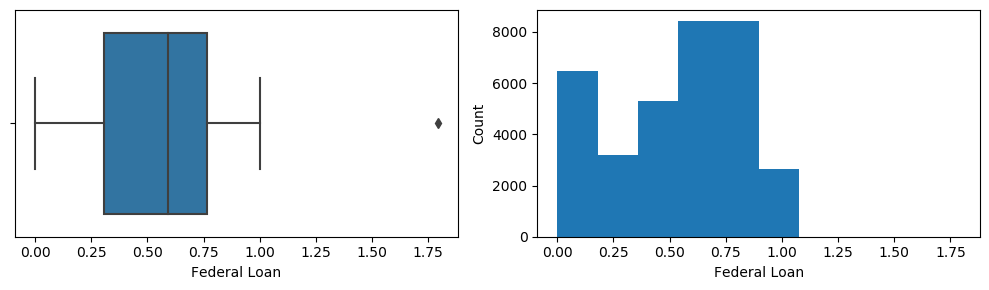

In [83]:
fig=plt.figure(figsize=(10,3), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('PCTFLOAN', data=data)
plt.xlabel('Federal Loan')

plt.subplot(1, 2, 2)
plt.hist(data['PCTFLOAN'])
plt.xlabel('Federal Loan')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [85]:
highloan = data['PCTFLOAN'].max()
highloan_school = data.loc[data['PCTFLOAN']== highloan]
print(highloan_school.INSTNM)
data.loc[highloan_school.index, 'PCTFLOAN'] = 1

40806    j f drake state technical college
Name: INSTNM, dtype: object


##  Explore the CURROPER column
- How many schools are open vs closed?
- What percentage of schools are open vs closed?
- How does this relate to control?

In [86]:
# How many schools are closed?
num_open = data['CURROPER'].sum()
print('Open:  ', num_open)

closed = data.loc[data['CURROPER']==False]
print('Closed:  ', closed.shape[0])

Open:   67061
Closed:   11555


In [87]:
#How many schools are closed by OPEID?
closed.OPEID.value_counts()

03422600    9
03422500    9
00992500    8
02605501    8
02559401    8
           ..
010490B7    1
03771306    1
04154100    1
02532103    1
00109001    1
Name: OPEID, Length: 2051, dtype: int64

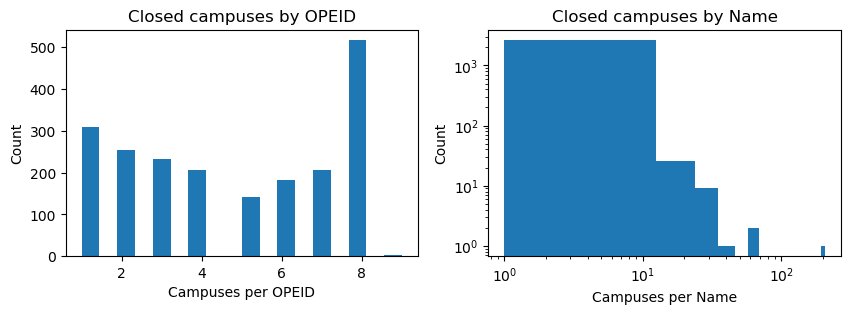

In [89]:
fig=plt.figure(figsize=(10,3), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.hist(closed.OPEID.value_counts(), bins=18)
plt.xlabel('Campuses per OPEID')
plt.ylabel('Count')
plt.title('Closed campuses by OPEID')

plt.subplot(1, 2, 2)
plt.hist(closed.INSTNM.value_counts(), bins=18)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Campuses per Name')
plt.ylabel('Count')
plt.title('Closed campuses by Name')
plt.tight_layout
plt.show()

In [90]:
closed.INSTNM.value_counts()

itt technical institute                206
marinello school of beauty              67
lincoln technical institute             64
ati career training center              42
sanford-brown institute                 35
                                      ... 
kaplan university-frederick campus       1
asher school of business                 1
lacy cosmetology school-west ashley      1
santiago canyon college                  1
marinello school of beauty-enfield       1
Name: INSTNM, Length: 2694, dtype: int64

ITT Technical Institute is the school name with the most number of campuses that are closed. This isn't surprising, since ITT Tech closed in 2016. ITT Tech also had the highest number of schools in the entire database.

In [111]:
control_cat = closed['CONTROL'].astype('str')
control_cat = control_cat.reset_index(drop = True)

for i in range(len(control_cat)):
    val = control_cat[i]
    cat = control_type[val]
    control_cat[i] = cat

print(control_cat.value_counts())
print('There are ', control_cat.isnull().sum(), 'null values.')

Private for-profit    8524
Private nonprofit     1759
Public                1271
Name: CONTROL, dtype: int64
There are  1 null values.


In [112]:
#predom_degree = {'0':'Not classified', '1':'Certificate', '2':'Associates', '3':'Bachelor', '4':'Graduate'}
pred_deg = closed['PREDDEG'].astype('str')
pred_deg = pred_deg.reset_index(drop=True)

for i in range(len(pred_deg)):
    val = pred_deg[i]
    cat = predom_degree[val]
    pred_deg[i] = cat

pred_deg.value_counts()
#closed['Primary degree type'].value_counts()

Certificate       7045
Associates        2001
Bachelor          1249
Not classified     929
Graduate           331
Name: PREDDEG, dtype: int64

In [117]:
closedControl = closed.pivot_table(index='PREDDEG', columns='CONTROL', aggfunc='size')
print(closedControl)

print(control_type)

CONTROL  1.0  2.0   3.0
PREDDEG                
0        143  167   618
1        725  679  5641
2        239  189  1573
3        147  501   601
4         17  223    91
{'1.0': 'Public', '2.0': 'Private nonprofit', '3.0': 'Private for-profit', 'nan': nan}


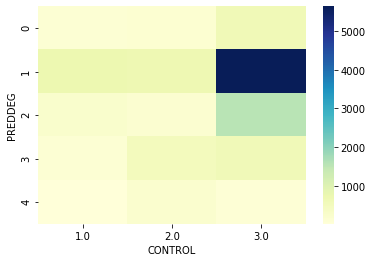

In [115]:
sns.heatmap(closedControl, cmap='YlGnBu')

The largest group of closed schools (5641, or 48.8%) are private, for-profit, primarily certificate-granting institutions. The next largest category (1573, or 13.6%) are private, for-profit associates-granting institutions.

## Bivariate exploration
### College enrollment
How does college enrollment correlate with school type, tuition revenue, expenditure, and operating status?

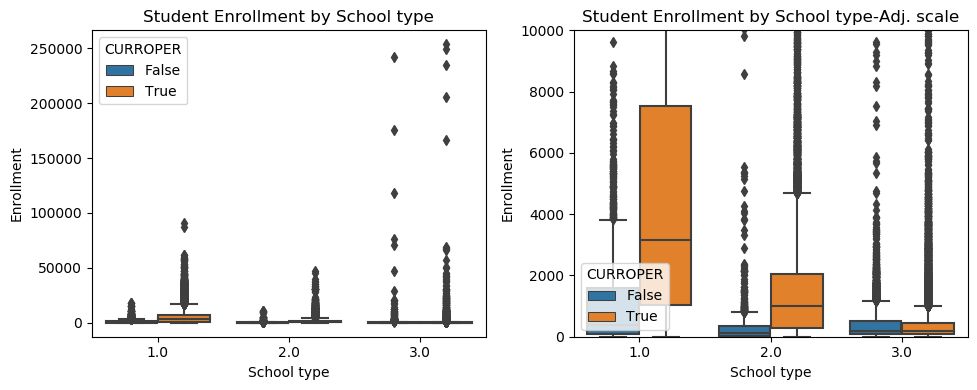

In [120]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('CONTROL', 'UGDS', data=data, hue = 'CURROPER')
plt.title('Student Enrollment by School type')
plt.xlabel('School type')
plt.ylabel('Enrollment')

plt.subplot(1, 2, 2)
sns.boxplot('CONTROL', 'UGDS', data=data, hue = 'CURROPER')
plt.title('Student Enrollment by School type-Adj. scale')
plt.ylim((0,10000))
plt.xlabel('School type')
plt.ylabel('Enrollment')
plt.tight_layout()
plt.show()

In [121]:
high_enrollment = data.loc[data['UGDS']>100000]
print(high_enrollment.CONTROL.value_counts())
data.drop(high_enrollment.index, inplace=True)

3.0    8
2.0    0
1.0    0
Name: CONTROL, dtype: int64


The schools with the highest enrollment, in fact, the 8 schools with more than 100,000 students, are all private for-profit schools. Zooming in on the plot to include just schools with less than 10,000 students gives a more detailed view of the bulk of the data.

Private for-profit schools can have much higher enrollments than the other two types of schools. Interestingly, some of the closed for-profit schools have really high enrollments.

Currently operating public schools have the highest median enrollment.

Given the high number of values outside the IQR range for all three school types it seems like binning the values for enrollment would make sense. - How do I decide what range of bins to use?

For the time being, I am going to exclude schools with Enrollment over 100,000 from the analysis.

In [122]:
EnrollmentBin = data.pivot_table(index='EnrollmentBins', columns='CONTROL', aggfunc='size')
EnrollmentBin

CONTROL,1.0,2.0,3.0
EnrollmentBins,,,
none,7,11,10
small,2180,3600,14466
medium,1882,3093,10365
large,4787,7054,6500
xl,13418,4330,973


### Enrollment vs Tuition Revenue

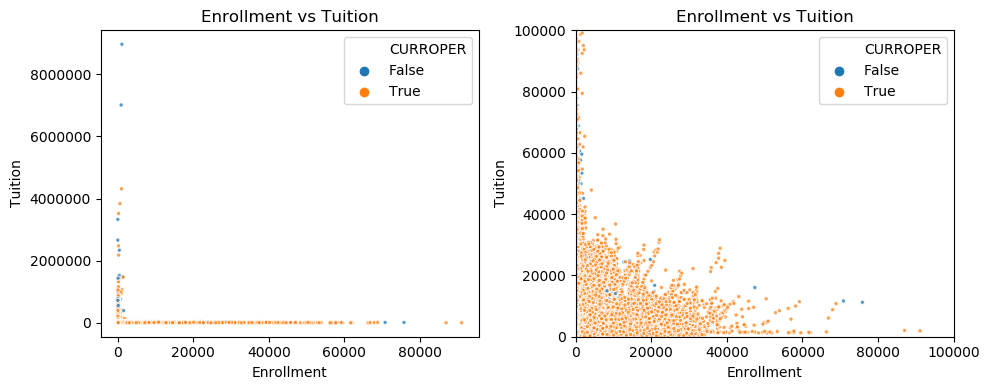

In [123]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('UGDS', 'TUITFTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
plt.title('Enrollment vs Tuition')

plt.subplot(1, 2, 2)
sns.scatterplot('UGDS', 'TUITFTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Enrollment vs Tuition')
plt.tight_layout()
plt.show()

In [125]:
fiveMilTuition = data.loc[data['TUITFTE']>5000000]
print('Currently Operating:')
print(fiveMilTuition.CURROPER.value_counts())

print('Control Type:')
print(fiveMilTuition.CONTROL.value_counts())
#data.drop(fiveMilTuition.index, inplace=True)

Currently Operating:
False    2
Name: CURROPER, dtype: int64
Control Type:
3.0    2
2.0    0
1.0    0
Name: CONTROL, dtype: int64


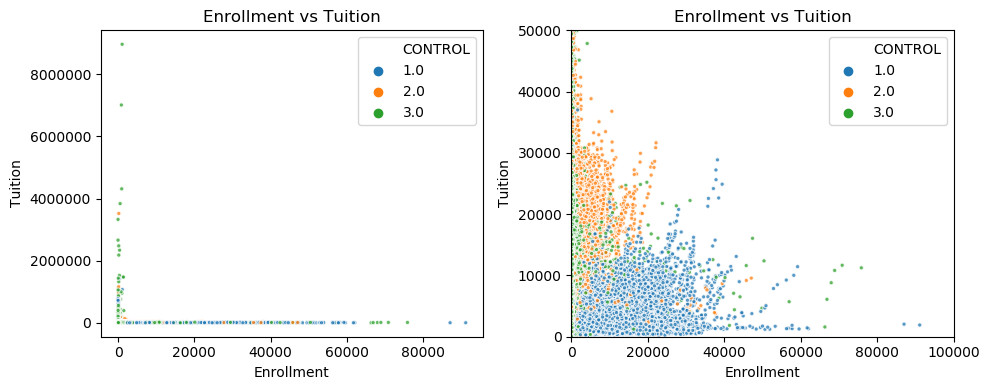

In [126]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('UGDS', 'TUITFTE', data=data, hue='CONTROL', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
plt.title('Enrollment vs Tuition')

plt.subplot(1, 2, 2)
sns.scatterplot('UGDS', 'TUITFTE', data=data, hue='CONTROL', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Tuition')
plt.xlim(0, 100000)
plt.ylim(0, 50000)
plt.title('Enrollment vs Tuition')
plt.tight_layout()
plt.show()

(0, 1000000)

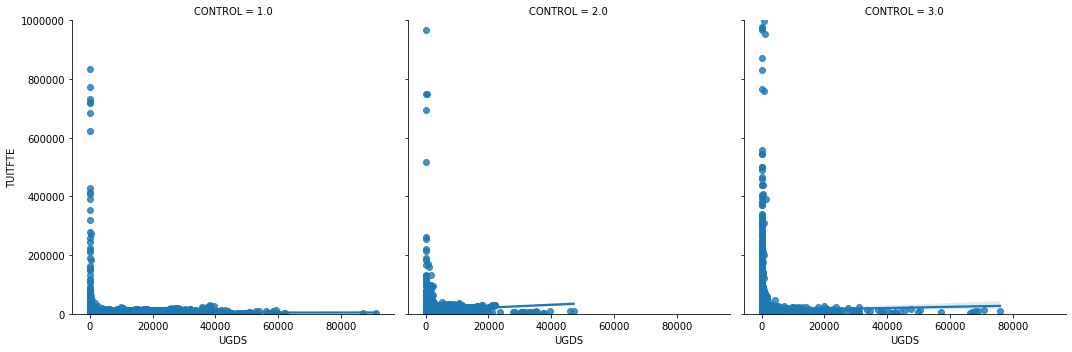

In [130]:
sns.lmplot( x='UGDS', y='TUITFTE', data=data , col='CONTROL')
plt.ylim(0, 1000000)

It appears that the schools with the highest enrollment AND lowest tuition are mostly public schools, and the schools with lowest enrollment and highest tuition are private nonprofit schools, with several private for-profit schools mixed in.

Text(0.5, 1.0, 'Enrollment (binned) vs Tuition Revenue')

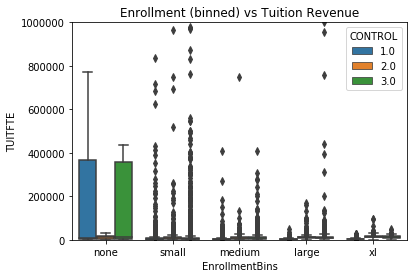

In [132]:
# Try to plot the Enrollment bins
sns.boxplot('EnrollmentBins', 'TUITFTE', hue='CONTROL', data=data)
plt.ylim(0, 1000000)
plt.title('Enrollment (binned) vs Tuition Revenue')

### Enrollment vs Expenditure

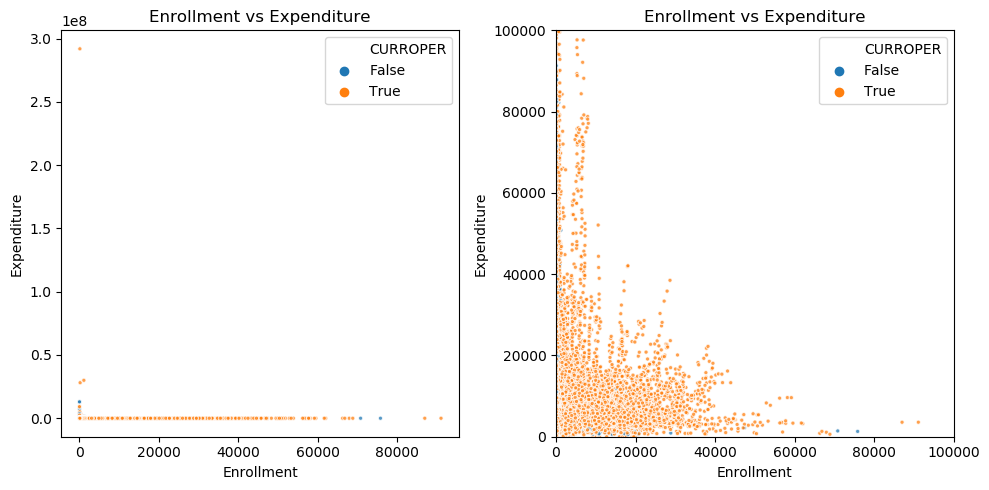

In [133]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('UGDS', 'INEXPFTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Expenditure')
plt.title('Enrollment vs Expenditure')

plt.subplot(1, 2, 2)
sns.scatterplot('UGDS', 'INEXPFTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Enrollment vs Expenditure')
plt.tight_layout()
plt.show()

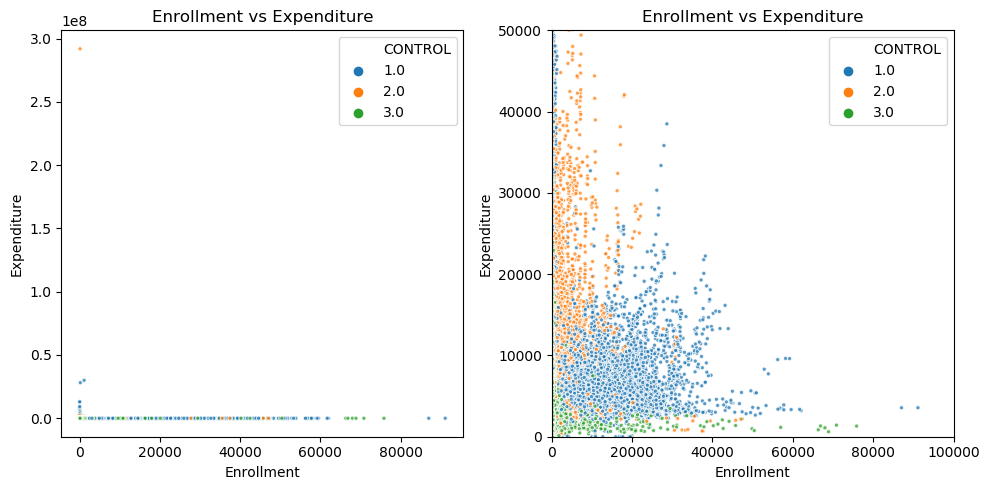

In [136]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('UGDS', 'INEXPFTE', data=data, hue='CONTROL', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Expenditure')
plt.title('Enrollment vs Expenditure')

plt.subplot(1, 2, 2)
sns.scatterplot('UGDS', 'INEXPFTE', data=data, hue='CONTROL', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 50000)
plt.title('Enrollment vs Expenditure')
plt.tight_layout()
plt.show()

(0, 100000)

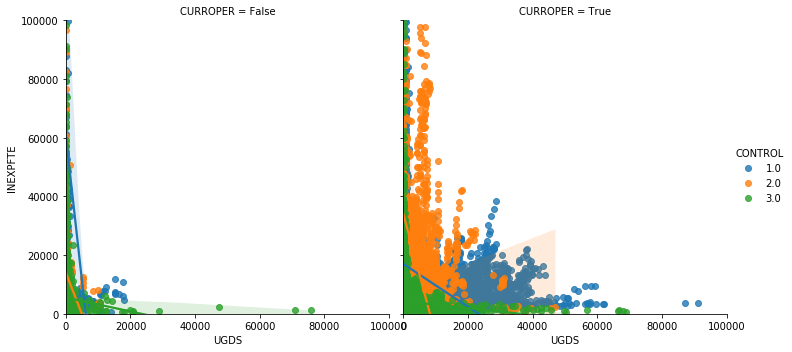

In [137]:
sns.lmplot( x='UGDS', y='INEXPFTE', data=data , hue='CONTROL', col='CURROPER')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
#plt.ylim(0, 2000000)

Private for-profit schools generally have the lowest expenditure, regardless of enrollment, while private nonprofit schools have gnerally higher expenditures and lower enrollments. Levels of expenditure and school control type are explored more below.

### Tuition and Expenditure
How does tuition revenue correlate with expenditure, school type and operating status?

In [138]:
data['TUITFTE'].groupby(data['CONTROL']).mean()

CONTROL
1.0     4158.112185
2.0    12756.205327
3.0    11554.376165
Name: TUITFTE, dtype: float64

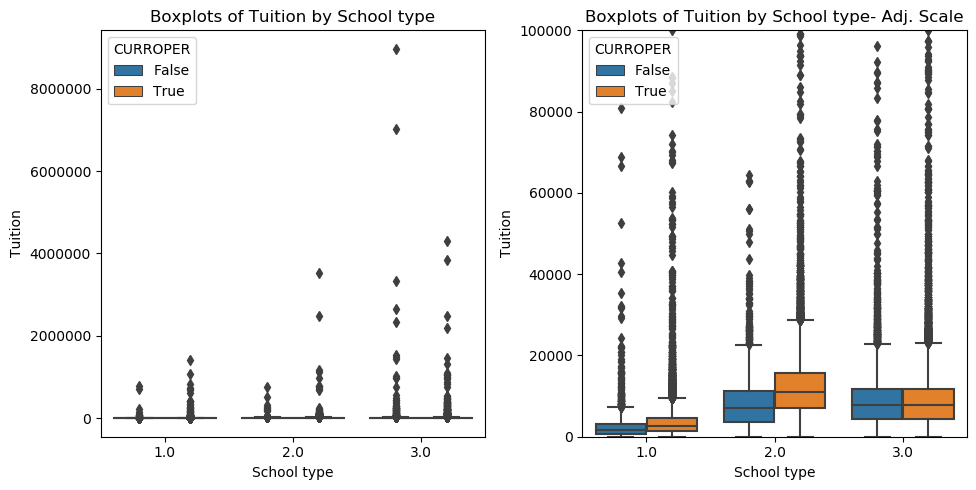

In [140]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('CONTROL', 'TUITFTE', data=data, hue = 'CURROPER')
plt.title('Boxplots of Tuition by School type')
plt.ylabel('Tuition')
plt.xlabel('School type')

plt.subplot(1, 2, 2)
sns.boxplot('CONTROL', 'TUITFTE', data=data, hue = 'CURROPER')
plt.title('Boxplots of Tuition by School type- Adj. Scale')
plt.ylim(0, 100000)
plt.ylabel('Tuition')
plt.xlabel('School type')
plt.tight_layout()
plt.show()

Public schools have the lowest mean tuition, while private for profit schools have the highest mean tuition, and private non-profit schools have the highest median tuition.

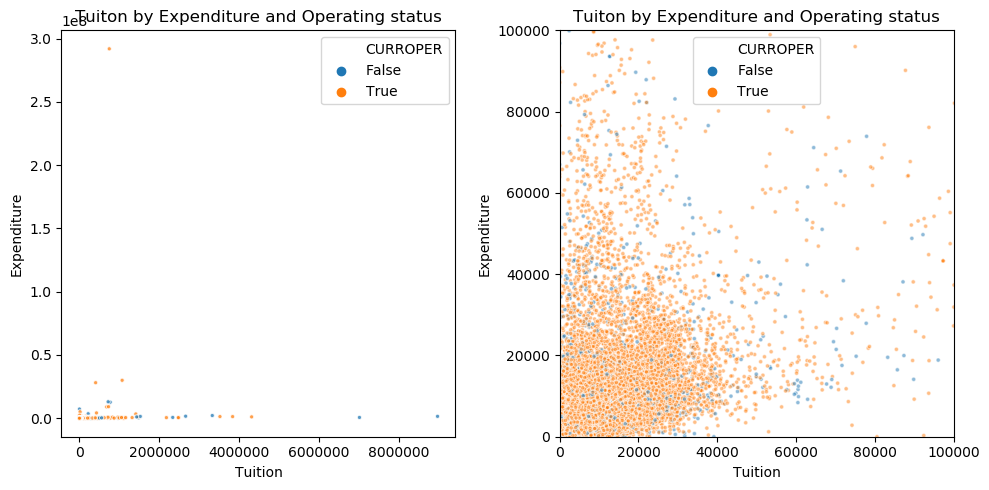

In [141]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TUITFTE', 'INEXPFTE', data=data, hue='CURROPER', marker='.', alpha=0.75)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.title('Tuiton by Expenditure and Operating status')

plt.subplot(1, 2, 2)
sns.scatterplot('TUITFTE', 'INEXPFTE', data=data, hue='CURROPER', marker='.', alpha=0.5)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Tuiton by Expenditure and Operating status')
plt.tight_layout()
plt.show()

I thought that perhaps tuition and expenditure would correlate - especially for the schools with the highest tuition and the highest expenditure. While there may be a correlation between tuition and expenditure in general, the schools with the highest expenditure are not the schools with the highest tuition, and vice versa.

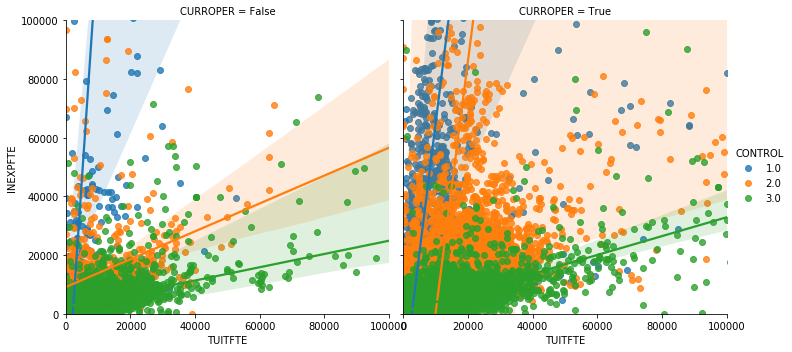

In [143]:
sns.lmplot( x='TUITFTE', y='INEXPFTE', data=data , hue='CONTROL', col='CURROPER')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.show()

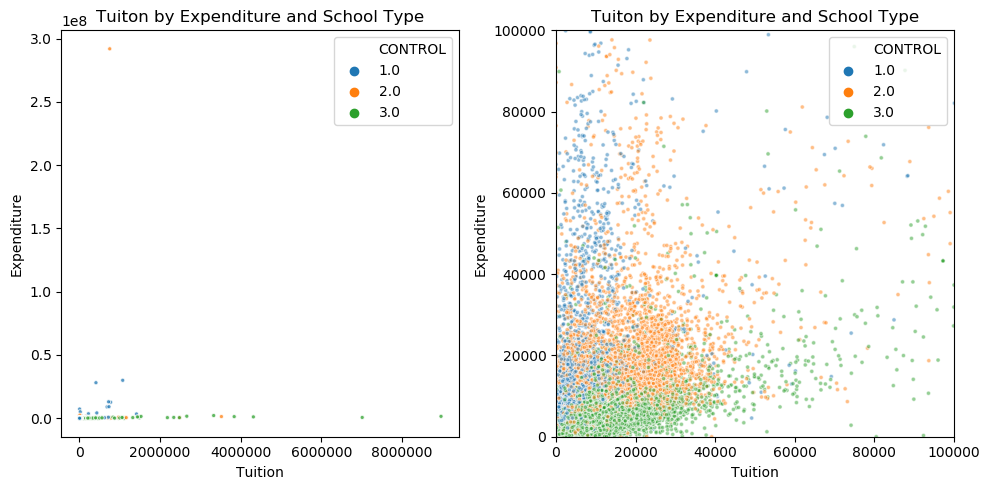

In [145]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TUITFTE', 'INEXPFTE', data=data, hue='CONTROL', marker='.', alpha=0.75)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.title('Tuiton by Expenditure and School Type')

plt.subplot(1, 2, 2)
sns.scatterplot('TUITFTE', 'INEXPFTE', data=data, hue='CONTROL', marker='.', alpha=0.5)
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.xlim(0, 100000)
plt.ylim(0, 100000)
plt.title('Tuiton by Expenditure and School Type')
plt.tight_layout()
plt.show()

(0, 5000000)

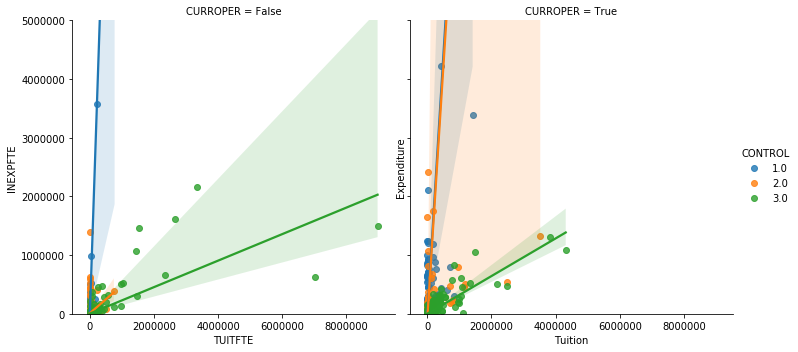

In [148]:
sns.lmplot(x='TUITFTE', y='INEXPFTE', data=data, hue='CONTROL', col = 'CURROPER')
plt.xlabel('Tuition')
plt.ylabel('Expenditure')
plt.ylim(0, 5000000)

In [150]:
data['INEXPFTE'].groupby(data['CONTROL']).mean()

CONTROL
1.0    14701.921673
2.0    24935.856271
3.0     4545.938777
Name: INEXPFTE, dtype: float64

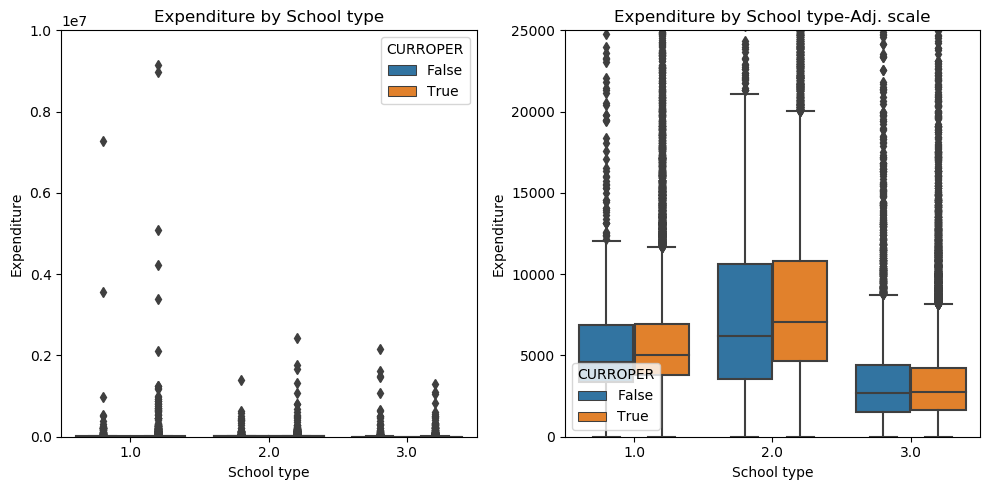

In [151]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('CONTROL', 'INEXPFTE', data=data, hue = 'CURROPER')
plt.title('Expenditure by School type')
plt.ylabel('Expenditure')
plt.xlabel('School type')
plt.ylim(0, 10000000)

plt.subplot(1, 2, 2)
sns.boxplot('CONTROL', 'INEXPFTE', data=data, hue = 'CURROPER')
plt.title('Expenditure by School type-Adj. scale')
plt.ylabel('Expenditure')
plt.xlabel('School type')
plt.ylim((0,25000))
plt.tight_layout()
plt.show()

Public schools have the highest mean expenditures, and more public schools with really high expenditure levels, but the median private nonprofit school spends more on students than the other two types of schools. Private for-profit schools have the lowest expenditure levels.

## Median debt amounts
How does median debt relate to enrollment and control?

In [152]:
data.DEBT_MDN.groupby(data.CONTROL).mean()

CONTROL
1.0     8311.134953
2.0    13563.979536
3.0     8398.777314
Name: DEBT_MDN, dtype: float64

In [154]:
maxDebtDF = data.loc[data.DEBT_MDN > 50000]
maxDebtDF.shape

(30, 37)

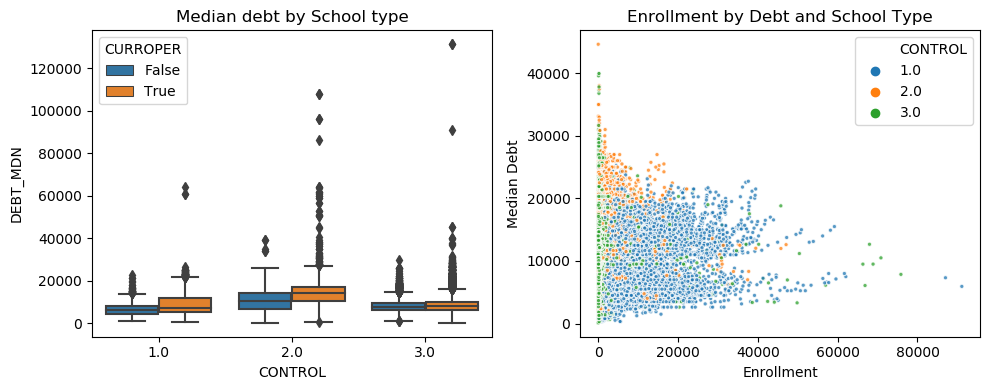

In [155]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('CONTROL', 'DEBT_MDN', data=data, hue = 'CURROPER')
plt.title('Median debt by School type')

plt.subplot(1, 2, 2)
sns.scatterplot('UGDS', 'DEBT_MDN', data=data, hue='CONTROL', marker='.', alpha=0.75)
plt.xlabel('Enrollment')
plt.ylabel('Median Debt')
plt.title('Enrollment by Debt and School Type')
plt.tight_layout()
plt.show()

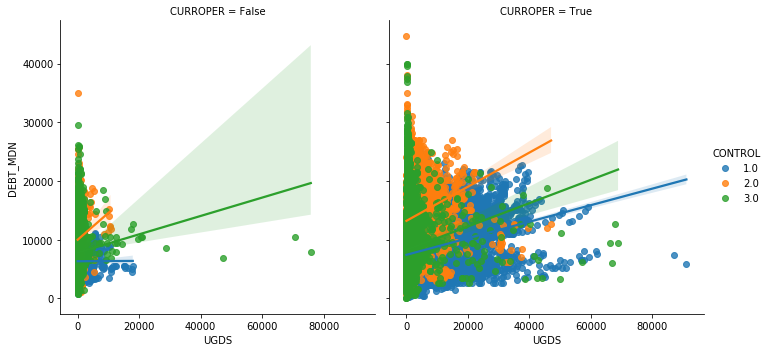

In [156]:
sns.lmplot( x='UGDS', y='DEBT_MDN', data=data , hue='CONTROL', col='CURROPER')

Students at public and private for-profit schools have almost identical median debt levels. Private nonprofit schools have much higher median debt levels.